In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2
using LaTeXStrings

In [36]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

points_on_sphere (generic function with 2 methods)

In [ ]:
function energy_plot_semilog(μ)
    solvers=[EulerForward, RK4, DTM, Rodas5, RadauIIA5]
    p = [θ, μ, β]
    Δ = Integer(N/1000)
    x_vals = [0, 200, 400, 600, 800, 1000]
    x_ticks = [string(Int(x/20)) for x in x_vals]
    plt = plot(palette = :seaborn_dark6,yaxis=:log,ylab=L"\textrm{Energy}",xlab=L"\textrm{Time}",xticks=(x_vals,x_ticks),xtickfontsize=8,ytickfontsize=8,legend=:topright)
    for solver = solvers
        M = points_solutions_matrix(p,Δt,N::Int64,init_points,solver)
        energy = sum(M.^2/n,dims=1)[:,1:Δ:end]
        plot!(plt,energy',label=latexstring("\\","textrm{", solver, "}"))
    end
    display(plt)
end

In [38]:
r = 250
Δt = 0.001
T = 50
N = Integer(T/Δt)
θ, β = 10, 8/3
;

In [39]:
n = 100
init_points = points_on_sphere(n, r)
;

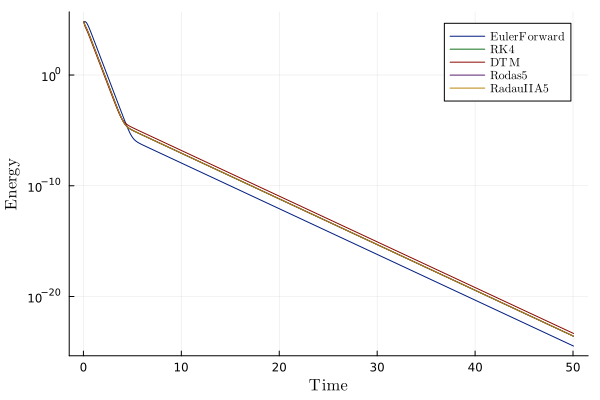

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_μ=0.5.png"

In [44]:
μ = 1/2
energy_plot_semilog(μ)
savefig(string("plots","\\","energy","\\","energy_μ=",μ,".png"))

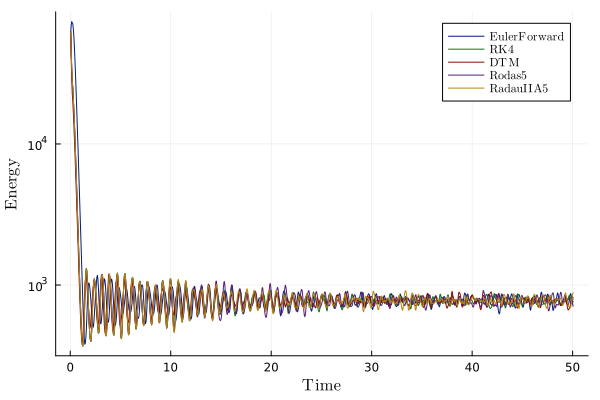

"c:\\Users\\Vilmer\\Julia\\Lorentz-System-Degree-Project\\Trying-to-clean-up-Numerical-Solvers\\plots\\energy\\energy_μ=28.png"

In [45]:
μ = 28
energy_plot_semilog(μ)
savefig(string("plots","\\","energy","\\","energy_μ=",μ,".png"))